In [314]:
using Plots
using QuadGK

In [315]:
function Φ(x)
    if abs(x) > 1
        return 0
    elseif x <= 0
        return (1+x)*(1+2x)
    else
        return (1-x)*(1-2x)
    end
end

function dΦ(x)
    if abs(x) > 1
        return 0
    elseif x <= 0
        return 3 + 4x
    else
        return -3 + 4x
    end
end

function ϕ(x)
    if abs(x) > 1/2
        return 0
    else
        return 1 - 4x^2
    end
end

function dϕ(x)
    if abs(x) > 1/2
        return 0
    else
        return -8x
    end
end

dϕ (generic function with 1 method)

In [316]:
function basis(n;diff=false)
    h = 1/n
    basis_size = 2n+1
    function basis_elem(j,x)
        if j == 1
            return 0
        end
        if j == basis_size
            return 0
        end
        z = j ÷ 2
        if j % 2 == 1
            z += 1
            x_z = (z-1)*h
            if !diff
                return Φ((x-x_z)/h)
            else
                # chain rule
                return dΦ((x-x_z)/h) * (1/h)
            end
        else
            x_z = (z-1/2)*h
            if !diff
                return ϕ((x-x_z)/h)
            else
                # chain rule
                return dϕ((x-x_z)/h) * (1/h)
            end
        end
    end
end

basis (generic function with 1 method)

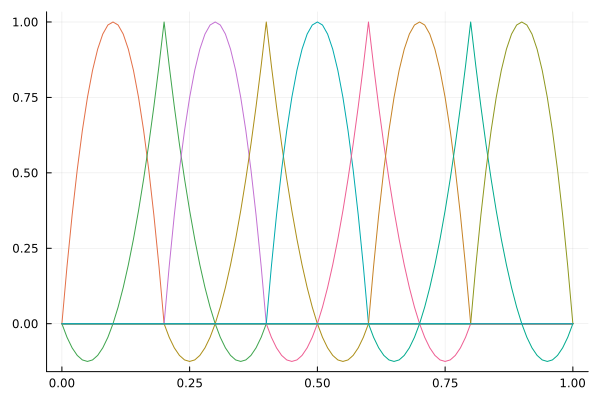

In [317]:

# Plot elements of basis
n = 5
ψ = basis(n)
plot()
for j in 1:2n+1
    xs = 0:0.01:1
    ys = [ψ(j,x) for x in xs]
    plot!(xs,ys)
end
plot!(legend=false)

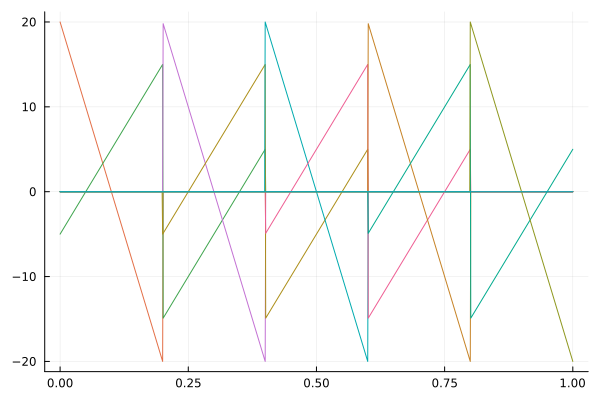

In [318]:
dψ = basis(n,diff=true)
plot()
for j in 1:2n+1
    xs = 0:0.001:1
    ys = [dψ(j,x) for x in xs]
    plot!(xs,ys)
end
plot!(legend=false)

In [319]:
function A_jk(n)
    basis_size = 2n+1
    A = zeros(basis_size,basis_size)
    dϕ = basis(n,diff=true)
    for j in 1:basis_size
        for k in 1:basis_size
            A[j,k] = quadgk(x -> dϕ(j,x)*dϕ(k,x),BigFloat(0),BigFloat(1))[1]
        end
    end
    return A
end

A_jk (generic function with 1 method)

In [321]:
# setting f to 2
f(x) = -(-20x^3 + 36x^2 - 18x + 2)
function b_k(n)
    basis_size = 2n+1
    b = zeros(basis_size)
    ϕ = basis(n)
    for k in 1:basis_size
        b[k] = quadgk(x -> f(x)*ϕ(k,x),BigFloat(0),BigFloat(1))[1]
    end
    return b
end

b_k (generic function with 1 method)

In [323]:
using LinearSolve
# Solve the system
function a_j(n)
    A = A_jk(n)
    b = b_k(n)
    problem = LinearProblem(A,b)
    linsolve = init(problem)
    solve(linsolve, SVDFactorization())
end

a_j (generic function with 1 method)

In [324]:
function u(n)
    a = a_j(n)
    ψ = basis(n)
    function u(x)
        u = 0
        for j in 1:2n+1
            u += a[j]*ψ(j,x)
        end
        return u
    end
end

u (generic function with 1 method)

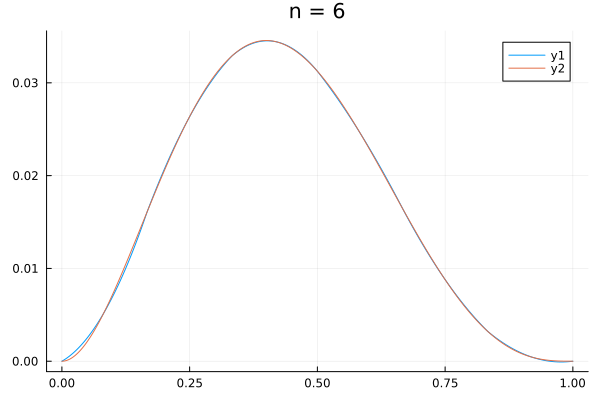

In [325]:
xs = 0:0.001:1
n = 6
sol = u(n)
realsol = x->(x^2)*(1-x)^3
ys = [sol(x) for x in xs]
ysreal = [realsol(x) for x in xs]
plot(xs,ys)
plot!(xs,ysreal,title="n = $n")